# **XAI**
Explainable AI (XAI) is an important aspect of machine learning that focuses on developing models and techniques that can be understood and interpreted by humans. It plays a crucial role in building trust and transparency in AI systems, especially in critical domains such as healthcare, finance, and autonomous vehicles. In this article, I will explore the concept of Explainable AI, its significance, and some of the techniques used for building explainable models. Additionally, I will provide code snippets to demonstrate the implementation of some popular XAI techniques.

**Introduction to Explainable AI**

Explainable AI (XAI) refers to the set of methods and techniques that enable humans to understand, trust, and effectively manage the decisions made by AI systems. While complex machine learning models, such as deep neural networks, often exhibit superior performance, their decision-making processes are often considered as black boxes, making it challenging for users to understand how specific predictions are made. XAI aims to bridge this gap by providing insights into the internal workings of these models, thereby making their outputs more transparent and interpretable.

**Significance of Explainable AI**

**Explainable AI is crucial for various reasons:**

1.Transparency and Trust: XAI fosters transparency by providing users with a clear understanding of how a model arrives at a particular decision. This transparency helps build trust among users and stakeholders.

2.Accountability and Compliance: In critical domains such as healthcare and finance, it is essential to ensure that decisions made by AI systems are accountable and comply with regulations. XAI enables auditing and validation of these decisions.

3.Bias Detection and Mitigation: XAI techniques can help in identifying and mitigating biases in AI models, thereby promoting fairness and equity in decision-making processes.

**Techniques for Explainable AI**

1.Feature Importance Analysis: One of the simplest forms of XAI involves determining the importance of features in influencing model predictions. This can be achieved through various techniques such as permutation importance and SHAP values.

2.LIME (Local Interpretable Model-agnostic Explanations): LIME is a popular method used for explaining the predictions of any classifier by approximating it with an interpretable model locally. It helps in understanding the decision-making process of complex models at the instance level.

3.SHAP (SHapley Additive exPlanations):SHAP is a powerful framework that assigns each feature an importance value for a particular prediction. It provides a unified approach to explain the output of any machine learning model.

**Implementation of XAI Techniques**
Scikit-learn Implementation (Feature Importance Analysis):

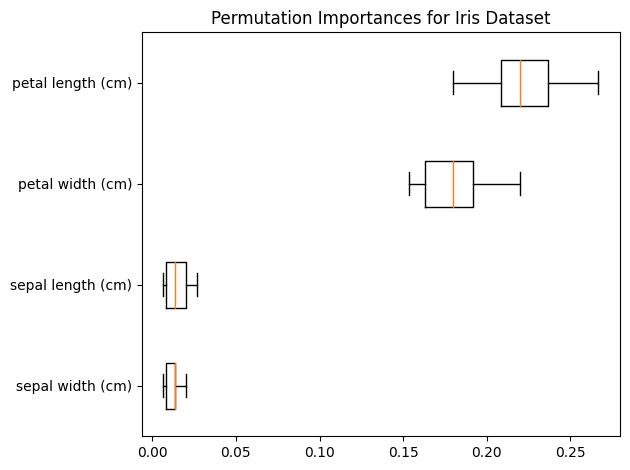

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Perform feature importance analysis
result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

# Plot the feature importance
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
ax.set_title("Permutation Importances for Iris Dataset")
fig.tight_layout()
plt.show()


TensorFlow Implementation (LIME):

Epoch 1/5
1875/1875 [==============================] - 23s 11ms/step - loss: 0.5378 - accuracy: 0.8091
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4206 - accuracy: 0.8478
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3922 - accuracy: 0.8566
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3721 - accuracy: 0.8635
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3560 - accuracy: 0.8676


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


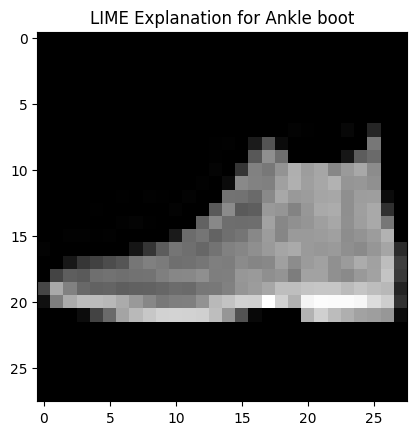

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the FashionMNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Duplicate the single channel to make it three channels
x_train = np.repeat(x_train, 3, -1)
x_test = np.repeat(x_test, 3, -1)

# Build and train a simple model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# Explain predictions using LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(x_test[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)
temp, mask = explanation.get_image_and_mask(y_test[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))
plt.title(f"LIME Explanation for {class_names[y_test[0]]}")
plt.show()

PyTorch Implementation (SHAP):

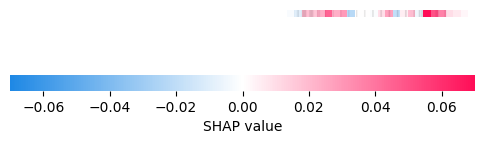

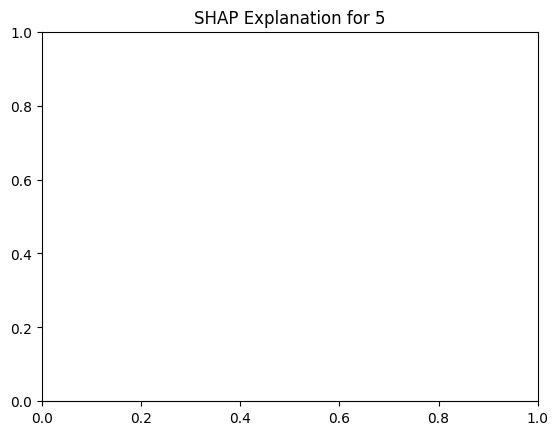

In [ ]:
import torch
import torchvision
from torchvision import transforms
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
class_names = [str(i) for i in range(10)]

# Extract some data for explanation
for images, labels in trainloader:
    break

# Build and train a simple model using PyTorch
model = torch.nn.Sequential(torch.nn.Linear(784, 128), torch.nn.ReLU(), torch.nn.Linear(128, 10))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop goes here

# Convert the data to PyTorch Tensors
images_tensor = images.view(images.shape[0], -1)

# Explain predictions using SHAP
population_size = images_tensor.shape[0]
sample_size = min(100, population_size)  # Ensuring the sample size doesn't exceed the population size
indices = np.random.choice(population_size, sample_size, replace=False)
background = images_tensor[indices]
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(images_tensor[0:1])

# Reshape the SHAP values for plotting
shap_values_reshaped = np.reshape(shap_values[0], (1, 28, 28))

# Plot the SHAP values
shap.image_plot(shap_values_reshaped, -images_tensor[0:1].numpy())
plt.title(f"SHAP Explanation for {class_names[labels[0].item()]}")
plt.show()


**Conclusion**

Explainable AI is crucial for ensuring the transparency, trustworthiness, and accountability of AI systems. By providing insights into the decision-making process of complex models, XAI techniques help in understanding the factors influencing model predictions. In this article, we discussed the significance of XAI and demonstrated the implementation of the SHAP technique for explainability. Understanding and implementing XAI techniques are essential for building reliable and trustworthy AI systems in various domains.